In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [21]:
df = pd.read_csv('mnist_784_csv.csv')

In [22]:
# Separate features and labels (last column is the label)
x = df.iloc[:, :-1].values  # Pixel values from columns 1 to 784
y = df.iloc[:, -1].values   # Labels from the last column


In [23]:
# Normalize the pixel values to be between 0 and 1
x = x / 255.0

In [24]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [26]:
# Define a smaller model
model = Sequential([
    Flatten(input_shape=(x_train.shape[1],)),  # Flatten the input (28*28)
    Dense(64, activation='relu'),
    Dropout(0.2),  # Dropout to prevent overfitting
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])


C:\Users\Shravani\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
# Compile the model with Adam optimizer and categorical cross-entropy loss
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
# Train the model and save the training history
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7247 - loss: 0.8723 - val_accuracy: 0.9349 - val_loss: 0.2106
Epoch 2/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9155 - loss: 0.2860 - val_accuracy: 0.9556 - val_loss: 0.1511
Epoch 3/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9343 - loss: 0.2242 - val_accuracy: 0.9608 - val_loss: 0.1308
Epoch 4/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9432 - loss: 0.1906 - val_accuracy: 0.9626 - val_loss: 0.1272
Epoch 5/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9500 - loss: 0.1622 - val_accuracy: 0.9639 - val_loss: 0.1163
Epoch 6/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9558 - loss: 0.1471 - val_accuracy: 0.9650 - val_loss: 0.1142
Epoch 7/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9554 - loss: 0.1434 - val_accuracy: 0.9674 - val_loss: 0.1067
Epoch 8/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9600 - loss: 0.1316 - 

In [29]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9677 - loss: 0.1137
Test Accuracy: 96.92%
Test Loss: 0.1046


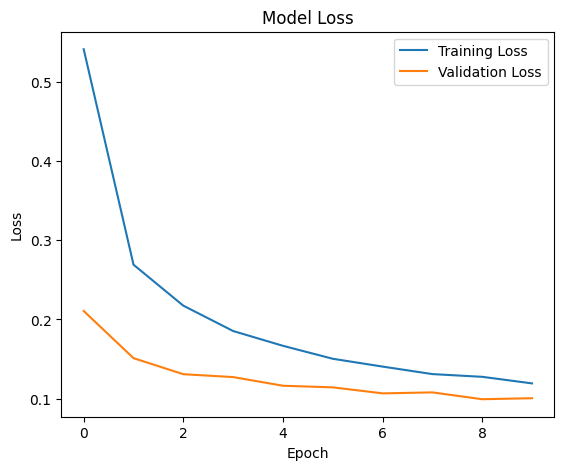

In [30]:
# Plot training & validation loss and accuracy over epochs
plt.figure(figsize=(14, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

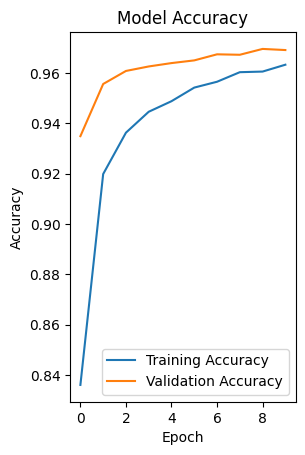

In [31]:
# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [34]:
# Make predictions
predictions = model.predict(x_test)
# Convert predictions and true labels back to integer labels for visualization
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)


438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [49]:
def plot_predictions(images, true_labels, predicted_labels, num_images=10):
    plt.figure(figsize=(12, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"True:{true_labels[i]}\nPredicted:{predicted_labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


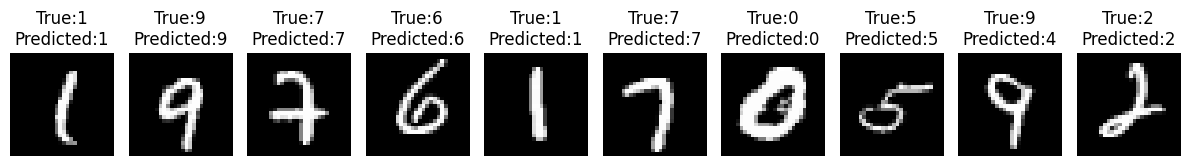

In [50]:
# Select 10 random test samples
indices = np.random.choice(len(x_test), 10, replace=False)
plot_predictions(x_test[indices], np.argmax(y_test[indices], axis=1), np.argmax(predictions[indices], axis=1))